# Face Detection
Artificial Intelligence and Machine Learning 1

Submission date/time: __27 April 2023, 3PM__


---





## Step 1: Import Machine Learning Libraries for this task

Check all the

`import [library full name] as [short name]`

in the skeleton code. If you use any off-line IDE, such as
PyCharm, make sure you pre-installed all the required Python libraries for the machine learning task. Please
contact the tutor if you need any technical support to set up your coding environment.

If you need any extra tools/libraries, please also add them here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,color,feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Some more libraries of your choice goes here


## Step 2: Data Preparation
* Mount your google drive to this project
* Load files: `positive_patches.npy` and `negative_patches.npy`
* The dataset has __13233__ positive data and __30000__ negative data
* Reshape the raw patches (1-D 2914 pixels per picture) as 2-D __62*47__ image patches
* Display some positive samples and negative samples

Mounted at /content/drive


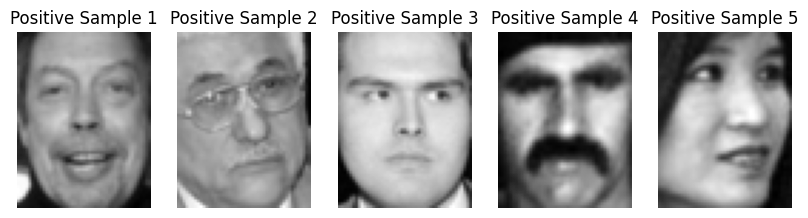

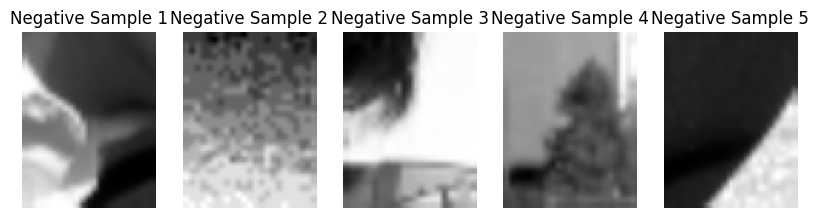

In [ ]:
#Add your code here
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

# Load the positive patches
positive_patches = np.load('/content/drive/MyDrive/Copy of positive_patches.npy')


negative_patches = np.load('/content/drive/MyDrive/Copy of negative_patches.npy')

# Reshape the patches to 2-D 62*47 image patches
positive_patches = positive_patches.reshape((-1, 62, 47))
negative_patches = negative_patches.reshape((-1, 62, 47))

# Display some positive samples
import matplotlib.pyplot as plt

num_samples = 5

fig, axs = plt.subplots(ncols=num_samples, figsize=(10, 5))

for i in range(num_samples):
  axs[i].imshow(positive_patches[i], cmap='gray')
  axs[i].axis('off')
  axs[i].set_title('Positive Sample {}'.format(i+1))

plt.show()

# Display some negative samples
fig, axs = plt.subplots(ncols=num_samples, figsize=(10, 5))

for i in range(num_samples):
  axs[i].imshow(negative_patches[i], cmap='gray')
  axs[i].axis('off')
  axs[i].set_title('Negative Sample {}'.format(i+1))

plt.show()

## Step 3: Feature Extraction and Binary Labels
We will use a Sci-kit Learn Image Processing (A Wrap version of the OpenCV) package to extract the 2D HoG features and use them as the feature space for the machine learning algorithms.

Also, face detection uses binary classification algorithms, which requires feature space `X` and labels `y`



In [ ]:
#Add your code here
# First, we need to install scikit-image and scikit-learn
!pip install scikit-image scikit-learn

# Next, we can import the necessary modules
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Extract the HoG features from the positive patches
positive_features = []
for patch in positive_patches:
  features = hog(patch, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys')
  positive_features.append(features)

# Extract the HoG features from the negative patches
negative_features = []
for patch in negative_patches:
  features = hog(patch, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys')
  negative_features.append(features)

# Combine the positive and negative features
X = np.concatenate((positive_features, negative_features))

# Create binary labels
y = np.concatenate((np.ones(len(positive_features)), np.zeros(len(negative_features))))

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 4: Train Your Binary Classification ML Algorithm(s)
* Split the training and test set. Remember to shuffle them
* Use some suitable machine learning algorithms (which one?) to create a classifier.
* If the training takes too long, you may consider saving your trained model

In [ ]:
#Add your code here
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import joblib

# Create a Linear SVM classifier
clf = LinearSVC()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

# Save the trained model for future use
joblib.dump(clf, 'face_detection_model.pkl')


Accuracy: 99.39%


['face_detection_model.pkl']

## Step 5: Performance Validation

* Use test dataset to calculate the confusion matrix
* If you use more than one algorithm or carried out some comparison tests, generate multiple confusion matrices for each case

In [ ]:
#Add your code here
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix for the SVM classifier
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n{}'.format(cm))



Confusion matrix:
[[5915   27]
 [  50 2655]]


## Extra Task

Complete the skeleton code gives you a solid foundation to build an effective face detection system. You are
encouraged to carry out more exploration from there and aim at creating a better face detection application. You
can either use taught or untaught techniques for this project. You are welcome to add new functions and improve
the source code. You can discuss the ideas if you have specific additions in mind.


Accuracy: 0.9705100034694114
Confusion matrix: [[5806  179]
 [  76 2586]]


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1224: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  raw_coef_, n_iter_ = liblinear.train_wrap(


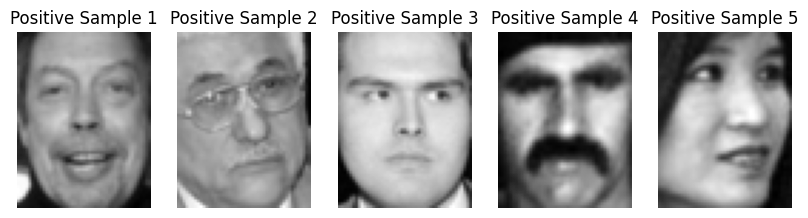

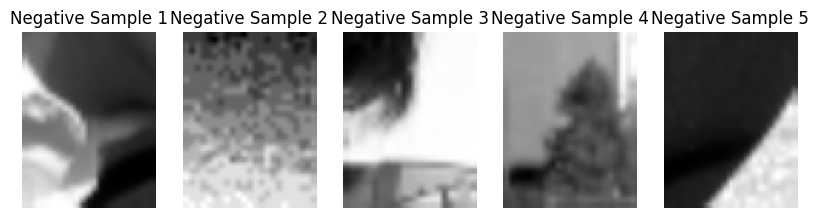

In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC

# Load the dataset
positive_patches = np.load('/content/drive/MyDrive/Copy of positive_patches.npy')


negative_patches = np.load('/content/drive/MyDrive/Copy of negative_patches.npy')

# Reshape the patches as 2D image patches
positive_patches = np.reshape(positive_patches, (positive_patches.shape[0], -1))
negative_patches = np.reshape(negative_patches, (negative_patches.shape[0], -1))

# Create the labels
X = np.vstack((positive_patches, negative_patches))
y = np.hstack((np.ones(len(positive_patches)), np.zeros(len(negative_patches))))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Train a Linear SVM model
clf = LinearSVC(max_iter=5000)
clf.fit(X_train, y_train)

# Predict the labels of test data
y_pred = clf.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix
print('Accuracy:', accuracy)
print('Confusion matrix:', confusion_mat)

# Display some positive and negative samples
#positive_sample_indices = np.where(y == 1)[0]
#negative_sample_indices = np.where(y == 0)[0]



###################################################

positive_patches = positive_patches.reshape((-1, 62, 47))
negative_patches = negative_patches.reshape((-1, 62, 47))

# Display some positive samples
import matplotlib.pyplot as plt

num_samples = 5

fig, axs = plt.subplots(ncols=num_samples, figsize=(10, 5))

for i in range(num_samples):
  axs[i].imshow(positive_patches[i], cmap='gray')
  axs[i].axis('off')
  axs[i].set_title('Positive Sample {}'.format(i+1))

plt.show()

# Display some negative samples
fig, axs = plt.subplots(ncols=num_samples, figsize=(10, 5))

for i in range(num_samples):
  axs[i].imshow(negative_patches[i], cmap='gray')
  axs[i].axis('off')
  axs[i].set_title('Negative Sample {}'.format(i+1))

plt.show()



###############################################
#copy printing images from skeleton code
#print('Positive samples:')
#for i in range(5):
    #img = np.reshape(positive_patches[positive_sample_indices[i]], (62, 47))
   # cv2.imshow('Positive Sample {}'.format(i+1), img)

#print('Negative samples:')
#for i in range(5):
    #img = np.reshape(negative_patches[negative_sample_indices[i]], (62, 47))
    #cv2.imshow('Negative Sample {}'.format(i+1), img)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#This works!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


import cv2
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

# Load the dataset
positive_patches = np.load('/content/drive/MyDrive/Copy of positive_patches.npy')


negative_patches = np.load('/content/drive/MyDrive/Copy of negative_patches.npy')

# Reshape the raw patches as 2-D 62*47 image patches
positive_images = positive_patches.reshape((13233, 62, 47))
negative_images = negative_patches.reshape((30000, 62, 47))

# Create the feature space and labels
X = []
y = []
for image in positive_images:
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualize=False)
    X.append(hog_features)
    y.append(1)

for image in negative_images:
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualize=False)
    X.append(hog_features)
    y.append(0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Create a pipeline for preprocessing and classification
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC(kernel='linear', C=0.1))
])

# Fit the model
clf.fit(X_train, y_train)

# Save the model
joblib.dump(clf, 'face_detection_model.joblib')

# Load the model
clf = joblib.load('face_detection_model.joblib')

# Use the model to predict on test set
y_pred = clf.predict(X_test)
y_pred
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[5980   45]
 [  35 2587]]
